# Assignment 1 -  probability of getting head, μ, of a biased coin.

## Importing Libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
import gif
from IPython.display import Image

## Maximum Likelihood Estimator & Dataset

In [26]:
# dataset of size = 160
size = 160
# randomly generaing max likelihood estimator
uml = np.random.rand()
# to ensure max likelihood estimator does not fall in the range [0.4, 0.6]
while uml >= 0.4 and uml <= 0.6:
    uml = np.random.rand()
# randomly generating a dataset of 160 coin tosses
data = np.random.choice([0, 1], size=size, p=[1 - uml, uml])
unique, counts = np.unique(data, return_counts = True)
uml = counts[1] / 160

In [27]:
print(f"µml = {uml}")

µml = 0.3


-------------------------------------------------------------------------------------------------------------------------------

## Prior Distribution

$$p(𝜇| 𝑎, 𝑏) = 𝐵𝑒𝑡𝑎(𝜇| 𝑎, 𝑏) = \frac{𝛤(𝑎 + 𝑏)}{{𝛤(𝑎)}{𝛤(𝑏)}}  𝜇 ^{𝑎−1}  (1 − 𝜇) ^{𝑏−1}$$

$$E[µ] = \frac{a}{a + b} $$

__Given, $E[µ] = 0.4$. Therefore, $a = \frac{2}{3} b$. The values of $a$ and $b$ are taken as $2$ and $3$ respectively.__

### Plotting Prior Distribution

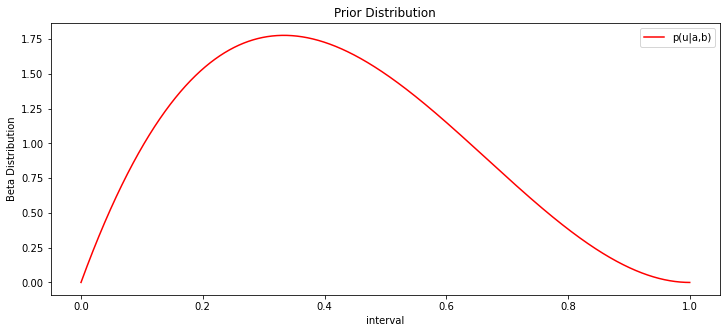

In [28]:
# Assumed hyperparameters of Beta Distribution
a , b = 2, 3
# interval between 0 & 1
x = np.linspace(0, 1, 10000)
fig = plt.figure(figsize = (12, 5))
ax = fig.add_subplot(1, 1, 1)
ax.set_ylabel("Beta Distribution")
ax.set_xlabel("interval")
ax.set_title("Prior Distribution")
ax.plot(x, beta.pdf(x, a, b), color = "red", label="p(u|a,b)")
ax.figure.savefig("prior_distribution.jpeg")
ax.legend();

-------------------------------------------------------------------------------------------------------------------------------

## Posterior Distribution

$$p(µ|m, l, a, b) = \frac{Γ(m + a + l + b)}{Γ(m + a)Γ(l + b)} µ^{m+a−1}(1 − µ)^{l+b−1}$$

$$E[µ] = \frac{a + m}{a + m + b + l} $$

where $m$ = number of heads in the dataset. $l$ = number of tails in the dataset = size of dataset - $m$ = 160 - $m$.

### I. Sequential Learning Approach

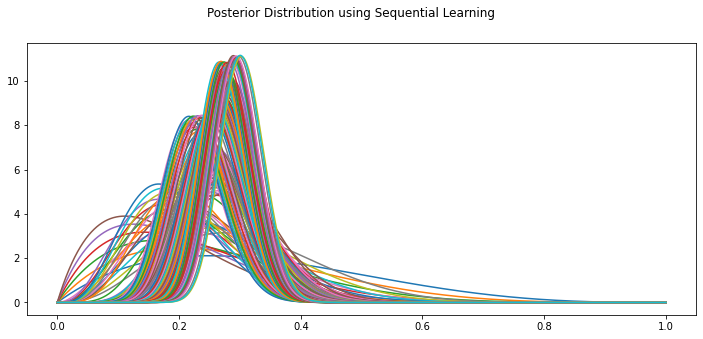

In [29]:
a, b = 2, 3
m, l = 0, 0
x = np.linspace(0, 1, 10000)
fig = plt.figure(figsize = (12, 5))
fig.suptitle('Posterior Distribution using Sequential Learning')
ax = fig.add_subplot(1, 1, 1)
for i in data:
    if i == 1:
        m += 1
    else:
        l += 1
    ax.plot(x, beta.pdf(x, a+m, b+l));
ax.figure.savefig("posterior_distribution.jpeg")

### Converting Sequential Plots into GIF: Evolution of Posterior

In [30]:
a, b = 2, 3
m, l = 0, 0
x = np.linspace(0, 1, 10000)
@gif.frame
def plot(a, b, m, l):
    y = beta.pdf(x, a + m, b + l)
    plt.plot(x, y)
    plt.xlim((0, 1))

In [31]:
frames = []
for i in data:
    if i == 1:
        m += 1
    else:
        l += 1
    frame = plot(a, b, m, l)
    frames.append(frame)

In [32]:
gif.save(frames, 'sequential_training.gif', duration=100, unit="ms", loop=True, between="frames")

__Evolution of Posterior: Sequential Learning__

<img src="sequential_training.gif" alt="kindly put all the files in same directory to display the GIF">

### II. Using Entire Dataset

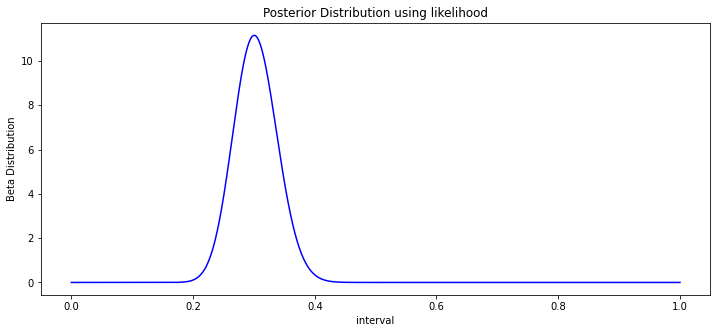

In [33]:
# Hyperparameters of the prior
a , b = 2, 3
# information from the dataset
m, l = counts[1], counts[0]
x = np.linspace(0, 1, 10000)
fig = plt.figure(figsize = (12, 5))
ax = fig.add_subplot(1, 1, 1)
ax.set_title("Posterior Distribution using likelihood")
ax.set_xlabel("interval")
ax.set_ylabel("Beta Distribution")
ax.plot(x, beta.pdf(x, a + m, b + l), color = "blue");
ax.figure.savefig("posterior_final.jpeg")

-------------------------------------------------------------------------------------------------------------------------------

# Report

### Introduction

__The dataset consists of 160 entries - each outcome representing a coin toss. x = 1 represents a head and x = 0, a tail. The dataset has been randomly generating using numpy libraries. The maximum likelihood estimator has been generated using numpy.random.rand() function and the corresponding dataset has been generated using numpy.random.choice() function. To ensure maximum likelihood estimator does not fall in the range [0.4, 0.6], uml is randomly generated while it falls in that range. A random dataset is generated every time the notebook is run.__

__The fraction of data having x = 1, represented by Bernoulli distribution and binomial distribution give extremely over-fitted results for small datasets. In order to incorporate a Bayesian viewpoint, the domain experts knowledge of the inherent bias of the coin is introduced as the prior distribution over parameter µ. Beta distribution is chosen as the prior as it exhibits conjugacy property.__

$$p(𝜇| 𝑎, 𝑏) = 𝐵𝑒𝑡𝑎(𝜇| 𝑎, 𝑏) = \frac{𝛤(𝑎 + 𝑏)}{{𝛤(𝑎)}{𝛤(𝑏)}}  𝜇 ^{𝑎−1}  (1 − 𝜇) ^{𝑏−1}$$

$$E[µ] = \frac{a}{a + b} $$ $$ $$ $$var[µ] = \frac {ab}{(a + b)^2(a + b + 1)}$$

__The hyperparameters a and b have been chosen as 2 and 3 so that the prior mean = $ \frac{a}{a+b}$ = 0.4 .__

<img src="prior_distribution.jpeg" alt="kindly put all the files in same directory to display the Image">

__Posterior distribution of µ is obtained by multiplying the beta prior by the binomial likelihood function and normalizing.__

$$p(µ|m, l, a, b) ∝ µ^{m+a−1}(1 − µ)^{l+b−1}$$

$m$ = number of 'heads' in the dataset. $l$ = $N − m$ = number of 'tails'.

$$p(µ|m, l, a, b) = \frac{Γ(m + a + l + b)}{Γ(m + a)Γ(l + b)} µ^{m+a−1}(1 − µ)^{l+b−1}$$ $$ $$ $$E[µ] = \frac{a + m}{a + m + b + l} $$

<img src="posterior_final.jpeg" alt="kindly put all the files in same directory to display the image">

__Evolution of Posterior in Sequential Learning__

<img src="sequential_training.gif" alt="kindly put all the files in same directory to display the GIF">

${Posterior} {Mean} {Value} = \frac{a+m}{{a+m}+{b+l}}$

In [34]:
print(f"final hyperparameters of posterior distribution are a = {a + m}, b = {b + l}")

final hyperparameters of posterior distribution are a = 50, b = 115


In [35]:
print(f"Posterior Mean Value obtained is {(a + m)/(a+m+b+l)}")

Posterior Mean Value obtained is 0.30303030303030304


### Similarities and Differences between sequential approach and likelihood approach:
__1. The sequential approach incorporates a Bayesian viewpoint. It is independent of the choice of the prior and the likelihood function. It records observations one at a time and discards them before the consideration of the next observation. At each stage, the derived posterior distribution acts as a prior distribution for the following data.__<br><br>
__2. Therefore, the sequential method comes in handy for large datasets for its ability to work with partial data as opposed to the whole dataset. On observing the plot, the beta distribution curve becomes increasingly sharp-peaked with an increase in  the number of observations.__<br><br>
__3. When the whole dataset is available at once, the number of ones and zeros in the dataset respectively updates the parameter values simultaneously.__<br><br>
__4. The posterior mean for µ always lies between the prior mean and the maximum likelihood estimate for µ for a finite dataset.__<br><br>
__5. Both the approaches yield the same final posterior distribution.__